### DESCRIÇÃO DO ESTUDO DE CASO

A satisfação do cliente é uma medida fundamental de sucesso. Clientes
insatisfeitos cancelam seus serviços e raramente expressam sua insatisfação antes
de sair. Clientes satisfeitos, por outro lado, se tornam defensores da marca!
O Banco Santander está pedindo para ajudá-los a identificar clientes
insatisfeitos no início do relacionamento. Isso permitiria que o Santander
adotasse medidas proativas para melhorar a felicidade de um cliente antes que
seja tarde demais.
Neste projeto de aprendizado de máquina, você trabalhará com centenas
de recursos anônimos para prever se um cliente está satisfeito ou insatisfeito com
sua experiência bancária.
Defina claramente o problema de negócio, faça a coleta e preparo dos
dados, escolha um algoritmo, treine o modelo e avalie a acurácia, que deve ser de
pelo menos 70%. 1 = Clientes Insatisfeitos e 0 = Clientes Satisfeitos

In [1]:
# Importando os modulos
import numpy as np
import pandas as pd

In [2]:
# Fazendo a Leitura do dataset de treino
train = pd.read_csv('train.csv', header = 0)# Especifica que a primeira linha é o cabeçalho.

In [3]:
# Fazendo a leitura do dataset de teste
test = pd.read_csv('test.csv', header = 0)

In [4]:
# Verificando os primeiros registros do dataset de treino
train.head(), test.head()

(   ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
 0   1     2     23                 0.0                      0.0   
 1   3     2     34                 0.0                      0.0   
 2   4     2     23                 0.0                      0.0   
 3   8     2     37                 0.0                    195.0   
 4  10     2     39                 0.0                      0.0   
 
    imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
 0                      0.0                      0.0                      0.0   
 1                      0.0                      0.0                      0.0   
 2                      0.0                      0.0                      0.0   
 3                    195.0                      0.0                      0.0   
 4                      0.0                      0.0                      0.0   
 
    imp_op_var40_efect_ult1  imp_op_var40_efect_ult3   ...    \
 0                      0.0           

###  ANÁLISE EXPLORATÓRIA DE DADOS

In [5]:
# Verificando quantidade de linhas e colunas. Notar que há 371 e 370 respectivamente.
train.shape, test.shape

((76020, 371), (75818, 370))

In [6]:
# Verificando a distribuição da variável TARGET. Desta forma é possível compreender se precisaremos fazer um balanceamento
# dos dados. Nitidamente os valores estão desbanlanceados.
train.groupby('TARGET').size()

TARGET
0    73012
1     3008
dtype: int64

In [7]:
 # Import do seaborn
import seaborn as sns 

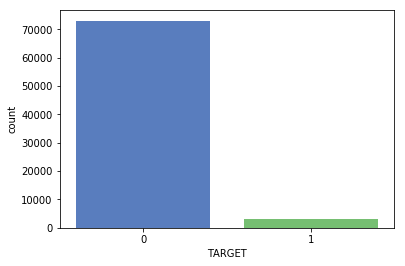

In [8]:
# Verificando o balanceamento dos dados de forma gráfica.
sns.countplot(x = 'TARGET', data = train, orient = 'vertical', palette = 'muted')

In [9]:
# Utilizando List Comprehension para verificar valores missing
[col for col in train.columns if train[col].isnull().sum()>0]

[]

In [10]:
# Verificação de valores nulos
train.isnull().sum()

ID                               0
var3                             0
var15                            0
imp_ent_var16_ult1               0
imp_op_var39_comer_ult1          0
imp_op_var39_comer_ult3          0
imp_op_var40_comer_ult1          0
imp_op_var40_comer_ult3          0
imp_op_var40_efect_ult1          0
imp_op_var40_efect_ult3          0
imp_op_var40_ult1                0
imp_op_var41_comer_ult1          0
imp_op_var41_comer_ult3          0
imp_op_var41_efect_ult1          0
imp_op_var41_efect_ult3          0
imp_op_var41_ult1                0
imp_op_var39_efect_ult1          0
imp_op_var39_efect_ult3          0
imp_op_var39_ult1                0
imp_sal_var16_ult1               0
ind_var1_0                       0
ind_var1                         0
ind_var2_0                       0
ind_var2                         0
ind_var5_0                       0
ind_var5                         0
ind_var6_0                       0
ind_var6                         0
ind_var8_0          

In [11]:
# Transformação da coluna target para INT
train['TARGET'] = train['TARGET'].astype(int)

In [13]:
# Define a quantidade de colunas a serem mostradas. Neste caso utilizei 10 colunas para posterior dar um describe em 10 colunas.
pd.set_option('display.max_columns',10)

In [14]:
# Verificando o resumo estatístico somente das 10 primeiras colunas, conforme comando acima.
train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,...,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,...,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,...,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,...,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [ ]:
# Datasets com muitas variáveis, que é o caso deste tendem a ter colunas duplicadas e variáveis constantes. 
# Variáveis constantes contêm apenas um valor para todas as saidas no conjunto de dados, e não fornecem informações
# que possam ajudar na classificação neste caso. Variáveis constantes têm valores com variação zero, pois todos os
# valores são iguais. Este notebook é a quarta versão, pois na terceira versão eu utilizei o metódo de seleção de 
# variaveis univariada 'SelectKBest' e retornou o seguinte aviso:

# C:\Users\DSA\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning:
# Features [ 22  23  57  58  59  60  81  85  86 132 133 134 135 156 162 163 180 181
# 190 193 221 223 235 239 245 249 262 263 304 308 316 320 328 350] are constant.
# UserWarning)
# C:\Users\DSA\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: 
# invalid value encountered in true_divide
#   f = msb / msw

# A partir deste warning foi que descobri sobre constant features. Valeu toda a pesquisa. ihuuuuuu. Pesquisei no site
# stackabuse.com onde pude entender sobre este assunto e parte do script foi retirado de lá.

In [15]:
# Import do módulo do pacote Sklearn para encontrar variáveis constantes
from sklearn.feature_selection import VarianceThreshold

In [16]:
# A função chama-se VarianceThreshold e o parametro 0 quer dizer que filtrará todas as colunas com variação 0.
constant_vars = VarianceThreshold(threshold = 0)

In [17]:
# Agora aplicamos no conjunto de dados
constant_vars.fit(train)

VarianceThreshold(threshold=0)

In [18]:
# Para obter as colunas constantes utilizamos o trecho de código abaixo e o método get_support()
len(train.columns[constant_vars.get_support()])

337

In [19]:
# Para obter as colunas não constantes
constant_cols = [column for column in train.columns  
                    if column not in train.columns[constant_vars.get_support()]]

print(len(constant_cols))  

34


In [20]:
# Agora devemos remover as variáveis constantes tanto no conjunto de treino como no de teste e para isso utilizaremos
train.drop(labels = constant_cols, axis = 1, inplace = True)
test.drop(labels = constant_cols, axis = 1, inplace = True)

In [21]:
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,...,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,...,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,...,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,...,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,...,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,...,0.0,0.0,0.0,117310.979016,0


In [22]:
test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,...,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,...,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,...,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,...,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,...,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,...,0.0,0.0,0.0,0.0,73649.73


In [23]:
# Recursos quase constantes: esses recursos têm os mesmos valores para um subconjunto muito grande das saídas. 
# Esses recursos não são muito úteis para fazer previsões. Não há regra quanto ao que deveria ser o limite para a 
# variância de recursos quase constantes. No entanto,
# como regra geral, remova os recursos quase constantes que têm mais de 99% de valores semelhantes para as observações de saída.
# Nesta seção, criaremos um filtro quase constante com a ajuda da VarianceThreshold. No entanto, em vez de passar 0 como o
# valor para o threshold (parâmetro), passaremos de 0,01, o que significa que, se a variação dos valores em uma coluna for menor
# que 0,01, remova essa coluna. Em outras palavras, remova a coluna de recursos em que aproximadamente 99% dos valores são 
# semelhantes. " fonte - https://stackabuse.com"
# O processo é praticamente o mesmo do anterior.
qconstant_vars = VarianceThreshold(threshold = 0.01)

In [24]:
# Agora aplicamos no conjunto de dados
qconstant_vars.fit(train)

VarianceThreshold(threshold=0.01)

In [25]:
# Para obter as colunas constantes utilizamos o trecho de código abaixo e o método get_support()
len(train.columns[qconstant_vars.get_support()])

274

In [26]:
# Para obter as colunas não constantes
qconstant_cols = [column for column in train.columns  
                    if column not in train.columns[qconstant_vars.get_support()]]

print(len(qconstant_cols))  

63


In [27]:
# Para verificar os nomes das colunas quase constantes fazemos um loop para percorrer cada uma delas
for column in qconstant_cols:
    print(column)

ind_var1
ind_var6_0
ind_var6
ind_var13_largo
ind_var13_medio_0
ind_var13_medio
ind_var14
ind_var17_0
ind_var17
ind_var18_0
ind_var18
ind_var19
ind_var20_0
ind_var20
ind_var29_0
ind_var29
ind_var30_0
ind_var31_0
ind_var31
ind_var32_cte
ind_var32_0
ind_var32
ind_var33_0
ind_var33
ind_var34_0
ind_var34
ind_var40
ind_var39
ind_var44_0
ind_var44
num_var6_0
num_var6
num_var13_medio_0
num_var13_medio
num_var18_0
num_var18
num_var29_0
num_var29
num_var33
num_var34_0
num_var34
ind_var7_emit_ult1
ind_var7_recib_ult1
num_aport_var33_hace3
num_aport_var33_ult1
num_var7_emit_ult1
num_compra_var44_hace3
num_meses_var13_medio_ult3
num_meses_var17_ult3
num_meses_var29_ult3
num_meses_var33_ult3
num_meses_var44_ult3
num_reemb_var13_ult1
num_reemb_var17_hace3
num_reemb_var17_ult1
num_reemb_var33_ult1
num_trasp_var17_in_hace3
num_trasp_var17_in_ult1
num_trasp_var17_out_ult1
num_trasp_var33_in_hace3
num_trasp_var33_in_ult1
num_trasp_var33_out_ult1
num_venta_var44_hace3


In [28]:
# Remoção das colunas que 99% dos valores são semelhantes. Lembrando que devemos remover no dataset de treino e no de teste.
train.drop(labels = qconstant_cols, axis = 1, inplace = True)
test.drop(labels = qconstant_cols, axis = 1, inplace = True)

In [29]:
# Verificando o shape dos datasets
train.shape, test.shape

((76020, 274), (75818, 273))

In [30]:
# Agora que já eliminamos as colunas com 0 variação, vamos rodar um modelo de seleção de variáveis a fim de entender
# um pouco mais sobre nossos dados

In [31]:
# Esta etapa normalmente seria feita mais adiante, mas como o dataset ainda está com muitas variáveis e praticamente não há 
# informações sobre elas, decidi utilizar a seleção de variáveis para focar nas variáveis mais relevantes para o modelo.
# Eu tentei fazer a seleção de variáveis atráves do teste do chi-quadrado, porém após pesquisar bastante, descobri que este
# teste não é valido para datasets que contenham numeros negativos, pois o teste chi2 assume que os valores são positivos.

# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

In [32]:
#!pip install xgboost # Instalação do xgboost - Eu já tenho o pacote instalado, por isso não executarei esta célula

In [33]:
# Partindo do pressuposto acima, vou utilizar o XGBClassifier que é outro método de seleção de variáveis muito utilizado
# nas competições do kaggle
from xgboost import XGBClassifier
from xgboost import plot_importance
import matplotlib as plt

In [34]:
train1 = train

In [35]:
# Dividindo os dados. O atributo iloc foi utilizado pois se trata de um dataframe e é necessário para se fazer o split
# por indexação.
# Lembrar aqui que o indice em python começa com 0, portanto como temos 274 colunas o meu x (é de 0 a 273) e (y é a 273), pois é
# a variável TARGET
x = train1.iloc[:, 0:273]
y = train1.iloc[:, 273]

In [36]:
# Fit nos dados de treino
feature_sel = XGBClassifier()
feature_sel.fit(x, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

AttributeError: module 'matplotlib' has no attribute 'show'

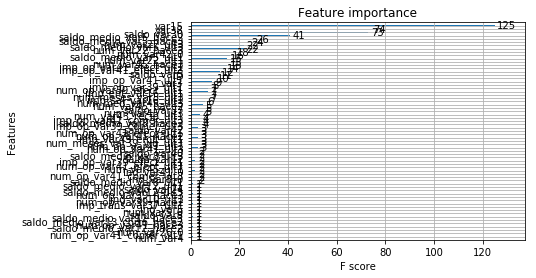

In [37]:
# Plot com as variáveis mais importantes. Claramente eu preciso ver o que acontece com o Matplotlib. Vai ficar para a próxima.
plot_importance(feature_sel)
plt.show()

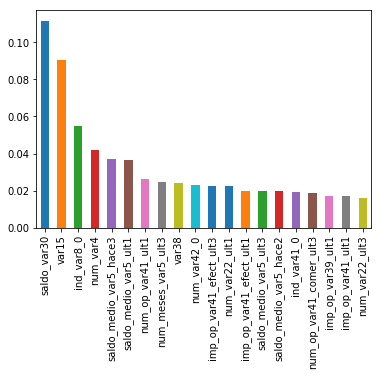

In [38]:
# Este trecho elenca as variáveis com maior importancia em forma gráfica
# Para rodar este trecho é necessário importar o pacote from xgboost import plot_importance
featimport = pd.Series(feature_sel.feature_importances_, index = x.columns)
featimport.nlargest(20).plot(kind ='bar') # aqui retornamos somente as 20 variáveis mais importantes

In [39]:
# Vale notar aqui que eu fiz um outro teste onde mantive todas as variáveis e rodei o XGBoost e o resultado foi o mesmo. Mesmo
# após ter retirado as variaveis com baixa variancia.
# Baseado no resultado acima farei um subset com as variáveis mais importantes segundo nosso feature selection feito
# com XGBoost
train2 = train[['ID','saldo_var30', 'var15' , 'ind_var8_0', 'num_var4', 'saldo_medio_var5_hace3', 'saldo_medio_var5_ult1', 'num_op_var41_ult1',
                       'num_meses_var5_ult3', 'var38', 'num_var42_0', 'imp_op_var41_efect_ult3', 'num_var22_ult1', 'imp_op_var41_efect_ult1', 'saldo_medio_var5_ult3',
                       'saldo_medio_var5_hace2', 'ind_var41_0', 'num_op_var41_comer_ult3', 'imp_op_var39_ult1', 'imp_op_var41_ult1',
                       'num_var22_ult3', 'TARGET']]
                      

In [40]:
# replicando para os dados de teste
test1 = test[['ID','saldo_var30', 'var15' , 'ind_var8_0', 'num_var4', 'saldo_medio_var5_hace3', 'saldo_medio_var5_ult1', 'num_op_var41_ult1',
                       'num_meses_var5_ult3', 'var38', 'num_var42_0', 'imp_op_var41_efect_ult3', 'num_var22_ult1', 'imp_op_var41_efect_ult1', 'saldo_medio_var5_ult3',
                       'saldo_medio_var5_hace2', 'ind_var41_0', 'num_op_var41_comer_ult3', 'imp_op_var39_ult1', 'imp_op_var41_ult1',
                       'num_var22_ult3']]

TypeError: 'module' object is not callable

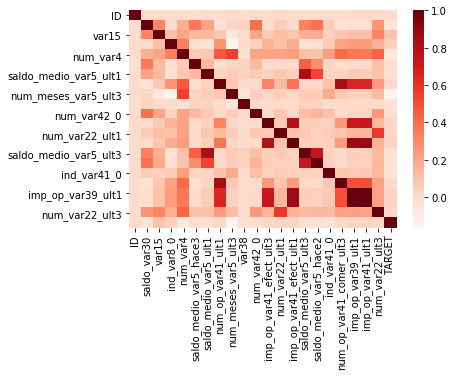

In [41]:
# Agora vamos utilizar a correlção de Pearson para verificar a correlação entre as variáveis.
corr = train2.corr()
sns.heatmap(corr, cmap = plt.cm.Reds)
plt.figure(figsize = (12, 10))
plt.show()

In [42]:
# Agora elencamos as variáveis com maior correlação em relação a variável TARGET. Notamos que praticamente todas as variáveis
# possui uma correlação positiva fraca. 
# Notar que as primeiras 5 variaveis com maior correlação, 4 delas estão entre as 5 no modelo do XGBoost. Exceto a
# saldo_medio_var5_hace3, portanto para análise do modelo utilizarei as 5 primeiras do modelo XGBoost + num_meses_var5_ult3 que
# é a primeira do modelo de correlação.
feature_corr = train2.corr().abs()
print(feature_corr['TARGET'].sort_values(ascending = False))

TARGET                     1.000000
num_meses_var5_ult3        0.148253
var15                      0.101322
num_var4                   0.080194
ind_var8_0                 0.046665
saldo_var30                0.037092
ind_var41_0                0.034149
imp_op_var41_efect_ult1    0.029479
imp_op_var41_ult1          0.027586
imp_op_var39_ult1          0.027416
num_var22_ult1             0.025189
imp_op_var41_efect_ult3    0.021486
saldo_medio_var5_hace2     0.020079
var38                      0.019510
saldo_medio_var5_ult3      0.018989
num_var42_0                0.017944
saldo_medio_var5_hace3     0.016034
saldo_medio_var5_ult1      0.015666
num_var22_ult3             0.012481
num_op_var41_ult1          0.011242
num_op_var41_comer_ult3    0.004403
ID                         0.003148
Name: TARGET, dtype: float64


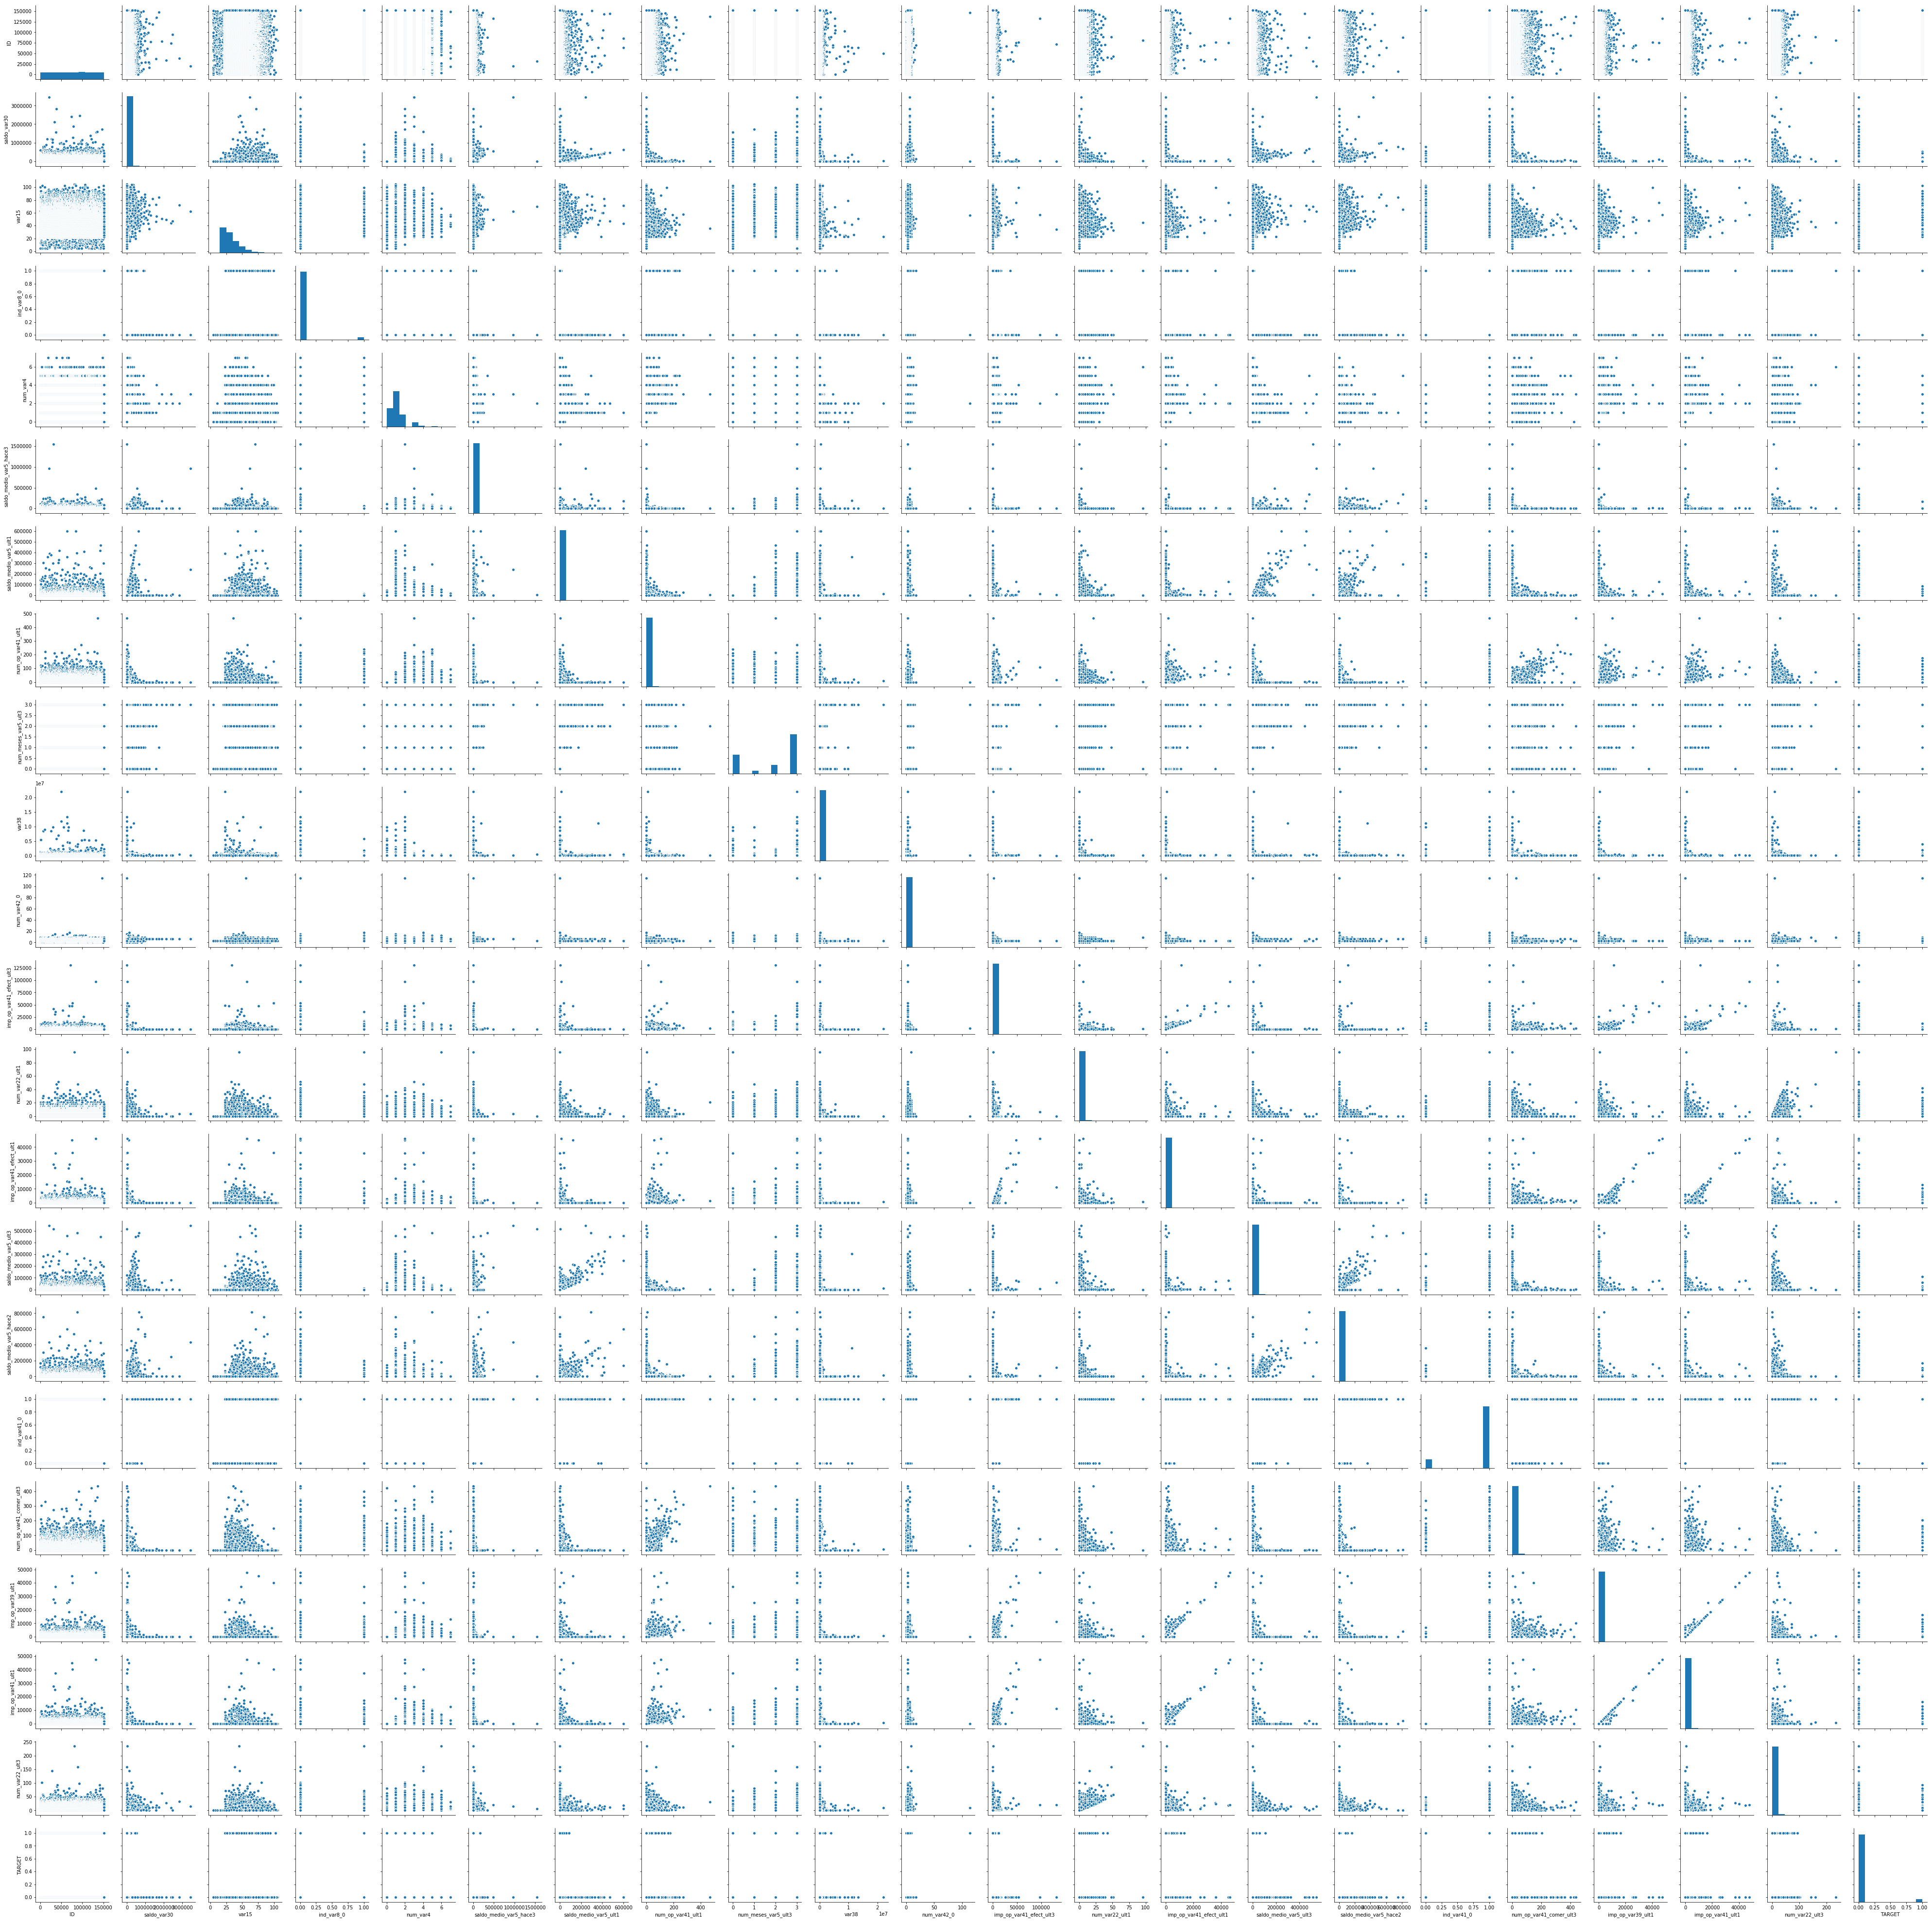

In [43]:
# Podemos verificar nos graficos de distribuição abaixo que muitas variáveis possuem valores 0. Quando temos datasets
# com muitos zeros chamamos de datasets esparsos e conforme dito no curso de FCD da DSA é interessante padronizar os dados.
sns.pairplot(train2)

In [44]:
# Notar que as primeiras 5 variaveis com maior correlação, 4 delas estão entre as 5 no modelo do XGBoost. Exceto a
# saldo_medio_var5_hace3, portanto para análise do modelo utilizarei as 5 primeiras do modelo XGBoost + num_meses_var5_ult3 que
# é a primeira do modelo de correlação.
train3 = train[['ID', 'num_meses_var5_ult3', 'var15', 'num_var4', 'ind_var8_0', 'saldo_var30', 
                      'saldo_medio_var5_hace3', 'TARGET']]

In [45]:
# Replicando para os dados de teste
test2 = test[['ID', 'num_meses_var5_ult3', 'var15', 'num_var4', 'ind_var8_0', 'saldo_var30', 
                      'saldo_medio_var5_hace3']]

In [46]:
# Conferindo os dados para garantir que estão com as mesmas variáveis
train3.head()

,ID,num_meses_var5_ult3,var15,num_var4,ind_var8_0,saldo_var30,saldo_medio_var5_hace3,TARGET
0,1,0,23,0,0,0.00,0.00,0
1,3,1,34,1,0,300.00,88.89,0
2,4,3,23,1,0,3.00,0.18,0
3,8,2,37,3,0,70.62,0.00,0
4,10,3,39,1,0,135003.00,0.30,0


In [47]:
# Conferindo os dados para garantir que estão com as mesmas variáveis. Nas competições do Kaggle você não verá a variável
# a ser prevista no dataset de teste.
test2.head()

,ID,num_meses_var5_ult3,var15,num_var4,ind_var8_0,saldo_var30,saldo_medio_var5_hace3
0,2,3,32,1,0,6.0,2.43
1,5,3,35,1,0,3.0,2.55
2,6,3,23,2,0,30.0,57.00
3,7,0,24,0,0,0.0,0.00
4,9,3,23,1,0,30.0,3.87


In [48]:
# Balanceamento da variável TARGET. Como vimos as classes estão totalmente desbalanceadas. 
# Classes desequilibradas colocam a “precisão” fora dos negócios. Esse é um problema surpreendentemente comum no aprendizado
# de máquina (especificamente na classificação), ocorrendo em conjuntos de dados com uma proporção desproporcional de observações
# em cada classe. 
# Rodar um modelo com as classes desequilibradas o fará tendencioso, enviesado e etc, porque normalmente os modelos tenderão
# a prever a classe majoritária.

In [49]:
# from imblearn.over_sampling import SMOTE, ADASYN

In [50]:
# Import do módulo Counter do pacote collections
# from collections import Counter
# A Counter é uma coleção não ordenada em que os elementos são armazenados
# como chaves de dicionário e suas contagens são armazenadas como valores de dicionário. As contagens podem ser qualquer valor
# inteiro, incluindo contagens zero ou negativas. Eu rodei um modelo sem balancear as classes e obtive acurácia de 95%, mas 
# nitidamente não era um valor a se considerar pois, este modelo estava prevendo somente a classe majoritária que no caso era (0)

In [51]:
# Existem várias técnicas de balanceamento de dados. Abaixo eu utilizei a técnica do pacote SMOTE, porém ao utilizar o método
# Counter para verificar se os dados foram balanceados vi que permaneceram do mesmo jeito. Ainda não descobri o que está
# acontecendo, portanto partirei para outra técnica. As linhas comentadas abaixo foi o código que utilizei para balancear a
# variável TARGET

In [52]:
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE, ADASYN

In [53]:
# Define o modelo SMOTE e especifico a classe minoritária para oversample
# y_resampled = train4.TARGET
# X_resampled = train4.drop('TARGET', axis = 1)

# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.30, random_state = 42)

In [54]:
# sm = SMOTE(random_state = 42, ratio = 1.0)
# X_train, y_train = sm.fit_sample(X_train, y_train)

In [55]:
# Neste trecho imprimimos o resultado e como já havia mencionado os dados não foram balanceados. Estão na mesma
# proporção de antes.
# print(sorted(Counter(y_resampled).items()))

In [56]:
# Agora utilizarei o método Resample
# Uma técnica amplamente adotada para lidar com conjuntos de dados altamente desbalanceados é chamada de reamostragem. 
# Consiste em remover amostras da classe majoritária (subamostragem) e / ou adicionar mais exemplos da classe minoritária
# (sobre-amostragem).

In [57]:
# Copia do dataset para não perder os dados
train4 = train3

In [58]:
# Import do módulo
from sklearn.utils import resample

In [59]:
# Divisão das classes em majoritária e minoritária
train_class_maj = train4[train4.TARGET == 0]
train_class_min = train4[train4.TARGET == 1]

In [60]:
# Sobreamostragem da classe minoritária
train_resampled_min = resample(train_class_min, 
                                 replace=True,     # amostra com substituição
                                 n_samples=73012,    # parametro para coincidir com a classe majoritaria(tamanho da classe)
                                 random_state=123) # parametro para poder reproduzir o resultado em outro notebook

In [61]:
# União das classes majoritaria e minoritária
train_resampled = pd.concat([train_class_maj, train_resampled_min])

In [62]:
# Após o balanceamento percebemos que agora as classes estão na mesma proporção.
train_resampled.TARGET.value_counts()

1    73012
0    73012
Name: TARGET, dtype: int64

### AVALIAÇÃO DA PERFORMANCE ANTES DE CRIAR OS MODELOS

In [63]:
# Avaliação usando dados de treino e de teste

# Import dos módulos
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore") # este trecho é somente para não aparecer mensagens de aviso.

# Separando as variáveis de input e variável target
X = train_resampled.iloc[:, 0: 6]
y = train_resampled.iloc[:, 7]

# Definindo o tamanho da amostra
teste_size = 0.30

# Garante que os resultados possam ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 42

# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, y_treino, y_teste = model_selection.train_test_split(X, y, 
                                                                         test_size = teste_size, 
                                                                         random_state = seed)

# Criação do modelo
log_reg = LogisticRegression()
log_reg.fit(X_treino, y_treino)

# Score
result = log_reg.score(X_teste, y_teste)
print("Acurácia: %.3f%%" % (result * 100.0))

Acurácia: 68.974%


In [64]:
# Verificando se o modelo está prevendo as duas classes.
print(np.unique(y_teste))

[0 1]


In [65]:
# Avaliação da performance usando Cross validation

# Importando os módulos
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

# Separando as variáveis de input e variável target
X = train_resampled.iloc[:, 0: 6]
y = train_resampled.iloc[:, 7]

# Definindo o tamanho dos folds
# refere ao número de grupos para os quais uma determinada amostra de dados deve ser dividida. Como tal, o procedimento
# é frequentemente chamado de validação cruzada k-fold. Quando um valor específico para k é escolhido, ele pode ser usado no
# lugar de k na referência ao modelo, como k = 10, tornando-se uma validação cruzada de 10 vezes.
# fonte: (https://machinelearningmastery.com/k-fold-cross-validation/)

# A escolha de k é geralmente 5 ou 10, mas não há regra formal. À medida que k aumenta, a diferença de tamanho entre o conjunto
# de treinamento e os subconjuntos de reamostragem fica menor. À medida que essa diferença diminui, o viés da técnica se torna 
# menor
# - Página 70, Applied Predictive Modeling , 2013.
# Um valor de k = 10 é muito comum no campo do aprendizado de máquina aplicado e é recomendável se você estiver com dificuldade
# para escolher um valor para o seu conjunto de dados.

num_folds = 10

# Garante que os resultados possam ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 42

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criação do modelo
c_validation = LogisticRegression()
result = cross_val_score(c_validation, X, y, cv = kfold)

In [66]:
# Imprimindo o resultado. Neste caso é utilizado a média e o desvião padrão, porque com o método cross_val_score serão
# feitos 10 processos de treino e teste de forma randomica.

print('Acurácia Final: %.3f(%.3f)' %(result.mean()*100.0, result.std()* 100.0))


Acurácia Final: 68.987(0.247)


In [67]:
# head para verificar o dataset
train_resampled.head()

,ID,num_meses_var5_ult3,var15,num_var4,ind_var8_0,saldo_var30,saldo_medio_var5_hace3,TARGET
0,1,0,23,0,0,0.00,0.00,0
1,3,1,34,1,0,300.00,88.89,0
2,4,3,23,1,0,3.00,0.18,0
3,8,2,37,3,0,70.62,0.00,0
4,10,3,39,1,0,135003.00,0.30,0


In [69]:
# head para verificar o dataset
test2.head()

,ID,num_meses_var5_ult3,var15,num_var4,ind_var8_0,saldo_var30,saldo_medio_var5_hace3
0,2,3,32,1,0,6.0,2.43
1,5,3,35,1,0,3.0,2.55
2,6,3,23,2,0,30.0,57.00
3,7,0,24,0,0,0.0,0.00
4,9,3,23,1,0,30.0,3.87


### PRÉ PROCESSAMENTO
Muitos algoritmos esperam receber os dados em um formato específico. É seu trabalho preparar os dados em uma estrutura que seja adequada ao algoritmo que você está utilizando.

É muito provável que você tenha que realizar tarefas de pré-processamento nos dados. Esse é um passo necessário dentro do processo. O desafio é o fato que cada algoritmo requer uma estrutura diferente, o que pode requerer transformações diferentes nos dados. Mas é possível em alguns casos, obter bons resultados sem um trabalho de pré-processamento. Mas é uma boa prática criar diferentes visões e transformações dos dados, de modo a poder testar diferentes algoritmos de Machine Learning.

### ESCALA

In [70]:
# Vamos colocar os dados em escala.
# E uma das primeiras tarefas dentro do pré-processamento, é colocar seus dados na mesma escala. Muitos algoritmos de Machine
# Learning vão se beneficiar disso e produzir resultados melhores. Esta etapa também é chamada de normalização e significa 
# colocar os dados em uma escala com range entre 0 e 1. Isso é útil para a otimização, sendo usado no core dos algoritmos de
# Machine Learning, como gradient descent. Isso também é útil para algoritmos como regressão e redes neurais e algoritmos que
# usam medidas de distância, como KNN. O scikit-learn possui uma função para esta etapa, chamada MinMaxScaler().

In [71]:
from sklearn.preprocessing import MinMaxScaler # pacote que faz esta operação

# Split do dataset
X = train_resampled.iloc[:, 0: 7]
y = train_resampled.iloc[:, 7]

# Geração da nova escala
scale = MinMaxScaler(feature_range = (0, 1))
rescaleX = scale.fit_transform(X)

# Resumo dos dados transformados
print(rescaleX[0:5,:])# Imprime as primeiras 5 linhas de todas as colunas

[[0.00000000e+00 0.00000000e+00 1.80000000e-01 0.00000000e+00
  0.00000000e+00 1.42715335e-03 5.21283337e-06]
 [1.31720200e-05 3.33333333e-01 2.90000000e-01 1.42857143e-01
  0.00000000e+00 1.51378295e-03 6.28457635e-05]
 [1.97580300e-05 1.00000000e+00 1.80000000e-01 1.42857143e-01
  0.00000000e+00 1.42801965e-03 5.32953860e-06]
 [4.61020700e-05 6.66666667e-01 3.20000000e-01 4.28571429e-01
  0.00000000e+00 1.44754596e-03 5.21283337e-06]
 [5.92740900e-05 1.00000000e+00 3.40000000e-01 1.42857143e-01
  0.00000000e+00 4.04113395e-02 5.40734208e-06]]


### PADRONIZAÇÃO

In [72]:
# A padronização é uma técnica útil para transformar atributos com uma distribuição gaussiana e diferentes médias e desvios
# padrão para uma distribuição Gaussiana padrão com uma média de 0 e um desvio padrão de 1.
# É mais adequado para técnicas que pressupõem uma distribuição gaussiana nas variáveis de entrada e funcionam melhor com
# dados reescalonados, como regressão linear, regressão logística e análise discriminante linear.
# Você pode padronizar dados usando o scikit-learn com a classe StandardScaler .

In [73]:
from sklearn.preprocessing import StandardScaler # Pacote que faz esta operação
 
# Split do dataset
X = train_resampled.iloc[:, 0: 7]
y = train_resampled.iloc[:, 7]

# Geração da nova escala
pad = StandardScaler().fit(X)
padX = pad.transform(X)

# Resumo dos dados transformados
print(padX[0:5,:])# Imprime as primeiras 5 linhas de todas as colunas

[[-1.72822067 -1.0947798  -1.02918041 -0.92173925 -0.234803   -0.16981633
  -0.06945896]
 [-1.72817536 -0.37633778 -0.17820458  0.09664711 -0.234803   -0.16357668
  -0.05749311]
 [-1.72815271  1.06054625 -1.02918041  0.09664711 -0.234803   -0.16975393
  -0.06943472]
 [-1.7280621   0.34210423  0.05387974  2.13341983 -0.234803   -0.16834751
  -0.06945896]
 [-1.72801679  1.06054625  0.20860262  0.09664711 -0.234803    2.63808831
  -0.06941857]]


### PROCESSO DE MACHINE LEARNING

In [74]:
# Utilizando Random Forest
# Import do pacote
from sklearn.ensemble import RandomForestClassifier

In [75]:
# Exclusão da coluna ID, pois as colunas nos dados de treino e teste devem ter a mesma quantidade
train_resampled = train_resampled.drop(['ID'], axis = 1)

In [76]:
# Separação do dataset
X = train_resampled.drop('TARGET', axis = 1)
y = train_resampled['TARGET']
x_test = test2.drop('ID', axis = 1).copy()

In [77]:
# Criação do modelo

rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X, y)
Y_predction = rf.predict(x_test)

rf.score(X, y)

accuracy = round(rf.score(X, y)*100, 2)

print(accuracy)


88.64


In [78]:
from pandas import read_csv

In [79]:
# Este trecho é para tenha que submeter o resultado para o Kaggle
submit = pd.DataFrame({
    'ID' : test2['ID'],
    'TARGET': Y_predction
})
submit.to_csv('Submission.csv', index = False)# Salvando o arquivo

In [80]:
arquivo = 'Submission.csv'
projeto = read_csv(arquivo)

In [81]:
# Resultado da predição
projeto

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0
5,11,1
6,12,0
7,15,1
8,16,0
9,17,0


## FIM